# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.



### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/6_mini/3,4일차/'

#### 3) 데이터 읽어오기

In [4]:
file1 = 'data2.pkl'

In [5]:
data = joblib.load(path + file1)
data.head()

,Date,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,target,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,month,Boarding rate,holiday,average_wait_time_7,day,holiday eve
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,1,0.903226,1,40.316706,Thursday,0.0
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,0.0,73.0,37.0,8.66,1,0.898987,0,40.316706,Friday,1.0
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,0.0,89.0,58.0,5.32,1,0.918689,1,40.316706,Saturday,1.0
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,0.0,95.0,52.0,6.48,1,0.927096,1,40.316706,Sunday,0.0
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,3.4,98.0,29.0,10.47,1,0.877647,0,40.316706,Monday,0.0


<Axes: xlabel='target', ylabel='Density'>

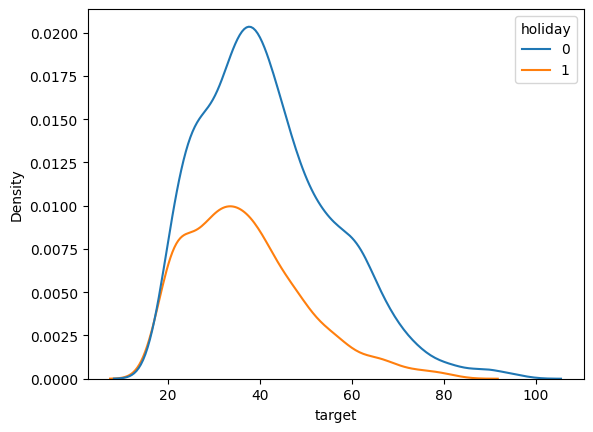

In [11]:
sns.kdeplot(hue=data["holiday"],x=data["target"])

In [ ]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=eadebad6b1b3e2cec2055324c6f29978b7b53e9be6def01d92c4bd459c0a3273
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Data Profiling Report")
profile.to_file(output_file = path + "output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

### (2) 가변수화

In [6]:
data = pd.get_dummies(data=data,columns=["month","day"])
data

,Date,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,target,temp_max_forecast,temp_min_forecast,...,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,0,0,0,0,0,0,0,1,0,0
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,0,0,0,1,0,0,0,0,0,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,0,0,0,0,0,0,1,0,0,0
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-26,603,5555,4605,39.2,2163,7889,44.4,3.0,-7.3,...,0,0,1,0,1,0,0,0,0,0
2918,2022-12-27,669,5635,4654,44.4,2198,8178,44.8,-0.3,-5.4,...,0,0,1,0,0,0,0,0,1,0
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52.5,1.7,-7.8,...,0,0,1,0,0,0,0,0,0,1
2920,2022-12-29,581,5250,4247,52.5,2229,8433,38.3,2.1,-4.0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
pd.options.display.max_columns = 50
data

,Date,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,target,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,Boarding rate,holiday,average_wait_time_7,holiday eve,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,0.903226,1,40.316706,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,0.0,73.0,37.0,8.66,0.898987,0,40.316706,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,0.0,89.0,58.0,5.32,0.918689,1,40.316706,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,0.0,95.0,52.0,6.48,0.927096,1,40.316706,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,3.4,98.0,29.0,10.47,0.877647,0,40.316706,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-26,603,5555,4605,39.2,2163,7889,44.4,3.0,-7.3,0.0,86.0,51.0,10.25,0.828983,0,43.485714,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2918,2022-12-27,669,5635,4654,44.4,2198,8178,44.8,-0.3,-5.4,0.1,92.0,40.0,10.86,0.825909,0,42.771429,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52.5,1.7,-7.8,0.0,71.0,34.0,10.88,0.822073,0,43.514286,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2920,2022-12-29,581,5250,4247,52.5,2229,8433,38.3,2.1,-4.0,0.0,87.0,38.0,10.84,0.808952,0,42.957143,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [ ]:
2922 - 91

2831

In [8]:
train = data.iloc[:2831,:]
test = data.iloc[2831:,:]
test

,Date,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,target,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,Boarding rate,holiday,average_wait_time_7,holiday eve,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
2831,2022-10-01,345,2528,2037,50.6,2487,10845,36.4,21.4,17.3,14.3,97.0,62.0,3.80,0.805775,1,44.057143,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2832,2022-10-02,249,1935,1631,36.4,2495,10803,24.9,23.3,17.5,69.6,100.0,95.0,1.06,0.842894,1,44.200000,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2833,2022-10-03,267,1707,1374,24.9,2367,9868,41.0,23.0,14.4,19.7,100.0,69.0,6.50,0.804921,1,41.257143,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2834,2022-10-04,650,5923,4968,41.0,2218,8345,48.4,21.3,14.1,0.1,92.0,53.0,15.62,0.838764,0,40.885714,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2835,2022-10-05,638,5916,4935,48.4,2214,8355,46.5,18.7,12.8,0.0,84.0,65.0,7.74,0.834178,0,41.414286,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-26,603,5555,4605,39.2,2163,7889,44.4,3.0,-7.3,0.0,86.0,51.0,10.25,0.828983,0,43.485714,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2918,2022-12-27,669,5635,4654,44.4,2198,8178,44.8,-0.3,-5.4,0.1,92.0,40.0,10.86,0.825909,0,42.771429,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52.5,1.7,-7.8,0.0,71.0,34.0,10.88,0.822073,0,43.514286,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2920,2022-12-29,581,5250,4247,52.5,2229,8433,38.3,2.1,-4.0,0.0,87.0,38.0,10.84,0.808952,0,42.957143,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [9]:
test = test.reset_index(drop=True)
test

,Date,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,target,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,Boarding rate,holiday,average_wait_time_7,holiday eve,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2022-10-01,345,2528,2037,50.6,2487,10845,36.4,21.4,17.3,14.3,97.0,62.0,3.80,0.805775,1,44.057143,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,2022-10-02,249,1935,1631,36.4,2495,10803,24.9,23.3,17.5,69.6,100.0,95.0,1.06,0.842894,1,44.200000,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,2022-10-03,267,1707,1374,24.9,2367,9868,41.0,23.0,14.4,19.7,100.0,69.0,6.50,0.804921,1,41.257143,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2022-10-04,650,5923,4968,41.0,2218,8345,48.4,21.3,14.1,0.1,92.0,53.0,15.62,0.838764,0,40.885714,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2022-10-05,638,5916,4935,48.4,2214,8355,46.5,18.7,12.8,0.0,84.0,65.0,7.74,0.834178,0,41.414286,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2022-12-26,603,5555,4605,39.2,2163,7889,44.4,3.0,-7.3,0.0,86.0,51.0,10.25,0.828983,0,43.485714,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
87,2022-12-27,669,5635,4654,44.4,2198,8178,44.8,-0.3,-5.4,0.1,92.0,40.0,10.86,0.825909,0,42.771429,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
88,2022-12-28,607,5654,4648,44.8,2161,7882,52.5,1.7,-7.8,0.0,71.0,34.0,10.88,0.822073,0,43.514286,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
89,2022-12-29,581,5250,4247,52.5,2229,8433,38.3,2.1,-4.0,0.0,87.0,38.0,10.84,0.808952,0,42.957143,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


#### 1) x, y 나누기

In [10]:
x_train = train.drop("target",axis=1)
y_train = train[["target"]]
x_test = test.drop("target",axis=1)
y_test = test[["target"]]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [11]:
a=["vehicle_operation","reception_cases","boarding_cases","average_wait_time","average_fare","average_boarding_distance","temp_max_forecast","temp_min_forecast",
   "rain(mm)_forecast","humidity_max(%)_forecast","humidity_min(%)_forecast","sunshine(MJ/m2)_forecast","Boarding rate","average_wait_time_7"]
x_train_scale = x_train[a]
x_ = x_train.drop(a,axis=1)
x_test_scale = x_test[a]
x__ = x_test.drop(a,axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train_scale)
x_test_s = scaler.transform(x_test_scale)

In [13]:
x_train_s = pd.DataFrame(x_train_s, columns=x_train_scale.columns)
x_test_s = pd.DataFrame(x_test_s, columns=x_test_scale.columns)
x_train_s

,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,Boarding rate,average_wait_time_7
0,-1.545618,-1.922936,-1.889561,-1.190898,1.139551,1.474434,-1.895619,-1.715240,-0.266757,-1.137458,-0.789054,-0.646334,1.158603,0.008971
1,0.037909,-0.496203,-0.343503,-1.611393,-0.831945,-0.640391,-1.484386,-1.743029,-0.266757,-0.427534,-0.243361,-0.705006,1.078291,0.008971
2,-1.576218,-1.505274,-1.413230,-0.980650,0.672372,0.918470,-0.942306,-0.872308,-0.266757,0.708344,1.029923,-1.182966,1.451564,0.008971
3,-1.675666,-1.506611,-1.403542,-1.099791,1.176925,1.662048,-0.970345,-0.974201,-0.266757,1.134298,0.666127,-1.016968,1.610831,0.008971
4,0.045559,0.233536,0.375839,-0.980650,-0.850632,-0.589313,-1.325501,-1.576295,0.001183,1.347275,-0.728422,-0.445991,0.674005,0.008971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,1.736185,1.367572,1.432649,0.371942,-0.645074,-0.720937,0.880204,0.415248,-0.266757,0.495367,-0.485892,1.085198,0.099411,0.317064
2827,1.927432,1.432393,1.471401,0.238786,-0.626386,-0.665930,0.702626,0.619033,-0.266757,0.353382,0.423597,-0.154064,-0.007759,0.334647
2828,1.950382,1.524613,1.543254,0.315876,-0.439515,-0.502874,0.749357,0.637559,-0.266757,0.921321,-0.303994,0.541411,-0.090961,0.344025
2829,1.835633,1.390293,1.407621,0.189728,-0.589012,-0.682629,0.880204,0.489351,-0.266757,0.708344,-0.243361,0.813305,-0.090038,0.312375


In [14]:
x_train = pd.concat([x_train_s,x_],axis=1)
x_train

,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,Boarding rate,average_wait_time_7,Date,holiday,holiday eve,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,-1.545618,-1.922936,-1.889561,-1.190898,1.139551,1.474434,-1.895619,-1.715240,-0.266757,-1.137458,-0.789054,-0.646334,1.158603,0.008971,2015-01-01,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.037909,-0.496203,-0.343503,-1.611393,-0.831945,-0.640391,-1.484386,-1.743029,-0.266757,-0.427534,-0.243361,-0.705006,1.078291,0.008971,2015-01-02,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-1.576218,-1.505274,-1.413230,-0.980650,0.672372,0.918470,-0.942306,-0.872308,-0.266757,0.708344,1.029923,-1.182966,1.451564,0.008971,2015-01-03,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.675666,-1.506611,-1.403542,-1.099791,1.176925,1.662048,-0.970345,-0.974201,-0.266757,1.134298,0.666127,-1.016968,1.610831,0.008971,2015-01-04,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.045559,0.233536,0.375839,-0.980650,-0.850632,-0.589313,-1.325501,-1.576295,0.001183,1.347275,-0.728422,-0.445991,0.674005,0.008971,2015-01-05,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,1.736185,1.367572,1.432649,0.371942,-0.645074,-0.720937,0.880204,0.415248,-0.266757,0.495367,-0.485892,1.085198,0.099411,0.317064,2022-09-26,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2827,1.927432,1.432393,1.471401,0.238786,-0.626386,-0.665930,0.702626,0.619033,-0.266757,0.353382,0.423597,-0.154064,-0.007759,0.334647,2022-09-27,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2828,1.950382,1.524613,1.543254,0.315876,-0.439515,-0.502874,0.749357,0.637559,-0.266757,0.921321,-0.303994,0.541411,-0.090961,0.344025,2022-09-28,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2829,1.835633,1.390293,1.407621,0.189728,-0.589012,-0.682629,0.880204,0.489351,-0.266757,0.708344,-0.243361,0.813305,-0.090038,0.312375,2022-09-29,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [15]:
x_test = pd.concat([x_test_s,x__],axis=1)
x_test

,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,Boarding rate,average_wait_time_7,Date,holiday,holiday eve,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,-0.535833,-0.917206,-0.990990,0.729363,1.700166,1.553998,0.291393,0.711663,0.860168,1.276283,1.272453,-1.400481,-0.687628,0.315892,2022-10-01,1,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,-1.270222,-1.313484,-1.318771,-0.265809,1.774914,1.512743,0.468971,0.730189,5.218137,1.489260,3.273327,-1.792579,0.015599,0.327614,2022-10-02,1,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,-1.132524,-1.465847,-1.526258,-1.071758,0.578936,0.594321,0.440932,0.443037,1.285720,1.489260,1.696881,-1.014106,-0.703815,0.086138,2022-10-03,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1.797384,1.351534,1.375327,0.056571,-0.813258,-0.901675,0.282047,0.415248,-0.258877,0.921321,0.726760,0.290983,-0.062644,0.055660,2022-10-04,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1.705585,1.346856,1.348685,0.575182,-0.850632,-0.891852,0.039045,0.294829,-0.266757,0.353382,1.454351,-0.836659,-0.149520,0.099032,2022-10-05,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1.437839,1.105614,1.082262,-0.069578,-1.327155,-1.349589,-1.428309,-1.567032,-0.266757,0.495367,0.605495,-0.477474,-0.247953,0.269003,2022-12-26,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
87,1.942732,1.159075,1.121822,0.294852,-1.000130,-1.065714,-1.736734,-1.391035,-0.258877,0.921321,-0.061464,-0.390182,-0.306179,0.210393,2022-12-27,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
88,1.468438,1.171772,1.116978,0.322885,-1.345842,-1.356465,-1.549810,-1.613347,-0.266757,-0.569519,-0.425259,-0.387320,-0.378865,0.271348,2022-12-28,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
89,1.269541,0.901795,0.793234,0.862520,-0.710479,-0.815235,-1.512425,-1.261353,-0.266757,0.566359,-0.182729,-0.393044,-0.627437,0.225631,2022-12-29,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [16]:
x_train = x_train.drop("Date",axis=1)
x_test = x_test.drop("Date",axis=1)

### (1) 머신러닝

#### 1) 모델1

In [17]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(random_state=42)
model_lgbm.fit(x_train,y_train)

LGBMRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
y_pred = model_lgbm.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

4.555065001885502
0.11276884951974975


In [26]:
pd.DataFrame(model_lgbm.feature_importances_,index=x_train.columns,columns=["feature_importances"]).sort_values("feature_importances",ascending=False)

,feature_importances
average_wait_time_7,292
average_wait_time,244
vehicle_operation,237
Boarding rate,228
average_boarding_distance,208
average_fare,191
reception_cases,189
boarding_cases,187
sunshine(MJ/m2)_forecast,183
temp_min_forecast,172


#### 2) 모델2

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(random_state=42)
model_cat.fit(x_train,y_train)
y_pred = model_cat.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

Learning rate set to 0.04826
0:	learn: 13.8582602	total: 50.4ms	remaining: 50.3s
1:	learn: 13.4917595	total: 53.8ms	remaining: 26.8s
2:	learn: 13.1205046	total: 56.9ms	remaining: 18.9s
3:	learn: 12.7729342	total: 60ms	remaining: 14.9s
4:	learn: 12.4581989	total: 63.1ms	remaining: 12.6s
5:	learn: 12.1573403	total: 66.3ms	remaining: 11s
6:	learn: 11.8777912	total: 70.9ms	remaining: 10.1s
7:	learn: 11.6092181	total: 74ms	remaining: 9.18s
8:	learn: 11.3387097	total: 77ms	remaining: 8.47s
9:	learn: 11.0937240	total: 80.1ms	remaining: 7.93s
10:	learn: 10.8721346	total: 83.2ms	remaining: 7.48s
11:	learn: 10.6464087	total: 86.3ms	remaining: 7.1s
12:	learn: 10.4542616	total: 89.2ms	remaining: 6.77s
13:	learn: 10.2615479	total: 92.3ms	remaining: 6.5s
14:	learn: 10.0765917	total: 95.2ms	remaining: 6.25s
15:	learn: 9.9218765	total: 98.3ms	remaining: 6.04s
16:	learn: 9.7711829	total: 101ms	remaining: 5.86s
17:	learn: 9.6221552	total: 105ms	remaining: 5.71s
18:	learn: 9.4912667	total: 108ms	remainin

#### 3) 모델3

In [ ]:
y_test.shape,y_pred.shape,y_train.shape

((91, 1), (91,), (2831, 1))

In [ ]:
y_test_ = y_test.values.reshape(-1)
y_train_ = y_train.values.reshape(-1)

In [ ]:
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(x_train,y_train_)
y_pred = model_svm.predict(x_test)
print(mean_absolute_error(y_test_,y_pred))
print(mean_absolute_percentage_error(y_test_,y_pred))

4.273568065730228
0.10645857556240809


### (2) 딥러닝

In [ ]:
from tensorflow import keras

#### 1) 모델1

In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(35,))
hl = keras.layers.Dense(256,activation="relu")(il)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(128,activation="relu")(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(64,activation="relu")(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

ol = keras.layers.Dense(1)(hl)

model = keras.models.Model(il,ol)
model.compile(loss = 'mean_absolute_percentage_error',metrics=["mean_absolute_percentage_error"],optimizer="adam")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense (Dense)               (None, 256)               9216      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

In [ ]:
x_train.shape

(2831, 35)

In [ ]:
2831-424

2407

In [ ]:
x_train_deep = x_train.iloc[:2407,:]
x_val_deep = x_train.iloc[2407:,:]

In [ ]:
y_train_deep = y_train.iloc[:2407,:]
y_val_deep = y_train.iloc[2407:,:]

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)
rl = ReduceLROnPlateau(monitor="val_loss",
                       patience=4,
                       factor=0.35,
                       verbose=1,
                       min_lr=0.0000001)
model.fit(x_train_deep,y_train_deep,epochs=1000,verbose=1,callbacks=[es,rl],validation_data=(x_val_deep,y_val_deep))

Epoch 1/1000
76/76 [==============================] - 4s 9ms/step - loss: 93.5760 - mean_absolute_percentage_error: 93.5760 - val_loss: 89.8432 - val_mean_absolute_percentage_error: 89.8432 - lr: 0.0010
Epoch 2/1000
76/76 [==============================] - 0s 6ms/step - loss: 84.5483 - mean_absolute_percentage_error: 84.5483 - val_loss: 63.4003 - val_mean_absolute_percentage_error: 63.4003 - lr: 0.0010
Epoch 3/1000
76/76 [==============================] - 0s 6ms/step - loss: 75.4042 - mean_absolute_percentage_error: 75.4042 - val_loss: 33.3252 - val_mean_absolute_percentage_error: 33.3252 - lr: 0.0010
Epoch 4/1000
76/76 [==============================] - 1s 7ms/step - loss: 66.2199 - mean_absolute_percentage_error: 66.2199 - val_loss: 22.0031 - val_mean_absolute_percentage_error: 22.0031 - lr: 0.0010
Epoch 5/1000
76/76 [==============================] - 0s 6ms/step - loss: 57.4808 - mean_absolute_percentage_error: 57.4808 - val_loss: 16.1172 - val_mean_absolute_percentage_error: 16.117

In [ ]:
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test_,y_pred))
print(mean_absolute_percentage_error(y_test_,y_pred))

3/3 [==============================] - 0s 3ms/step
4.617512721805782
0.11253359171537566


#### 2) 모델2

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [21]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

,feature_name,feature_importance
0,average_wait_time_7,292
1,average_wait_time,244
2,vehicle_operation,237
3,Boarding rate,228
4,average_boarding_distance,208
5,average_fare,191
6,reception_cases,189
7,boarding_cases,187
8,sunshine(MJ/m2)_forecast,183
9,temp_min_forecast,172


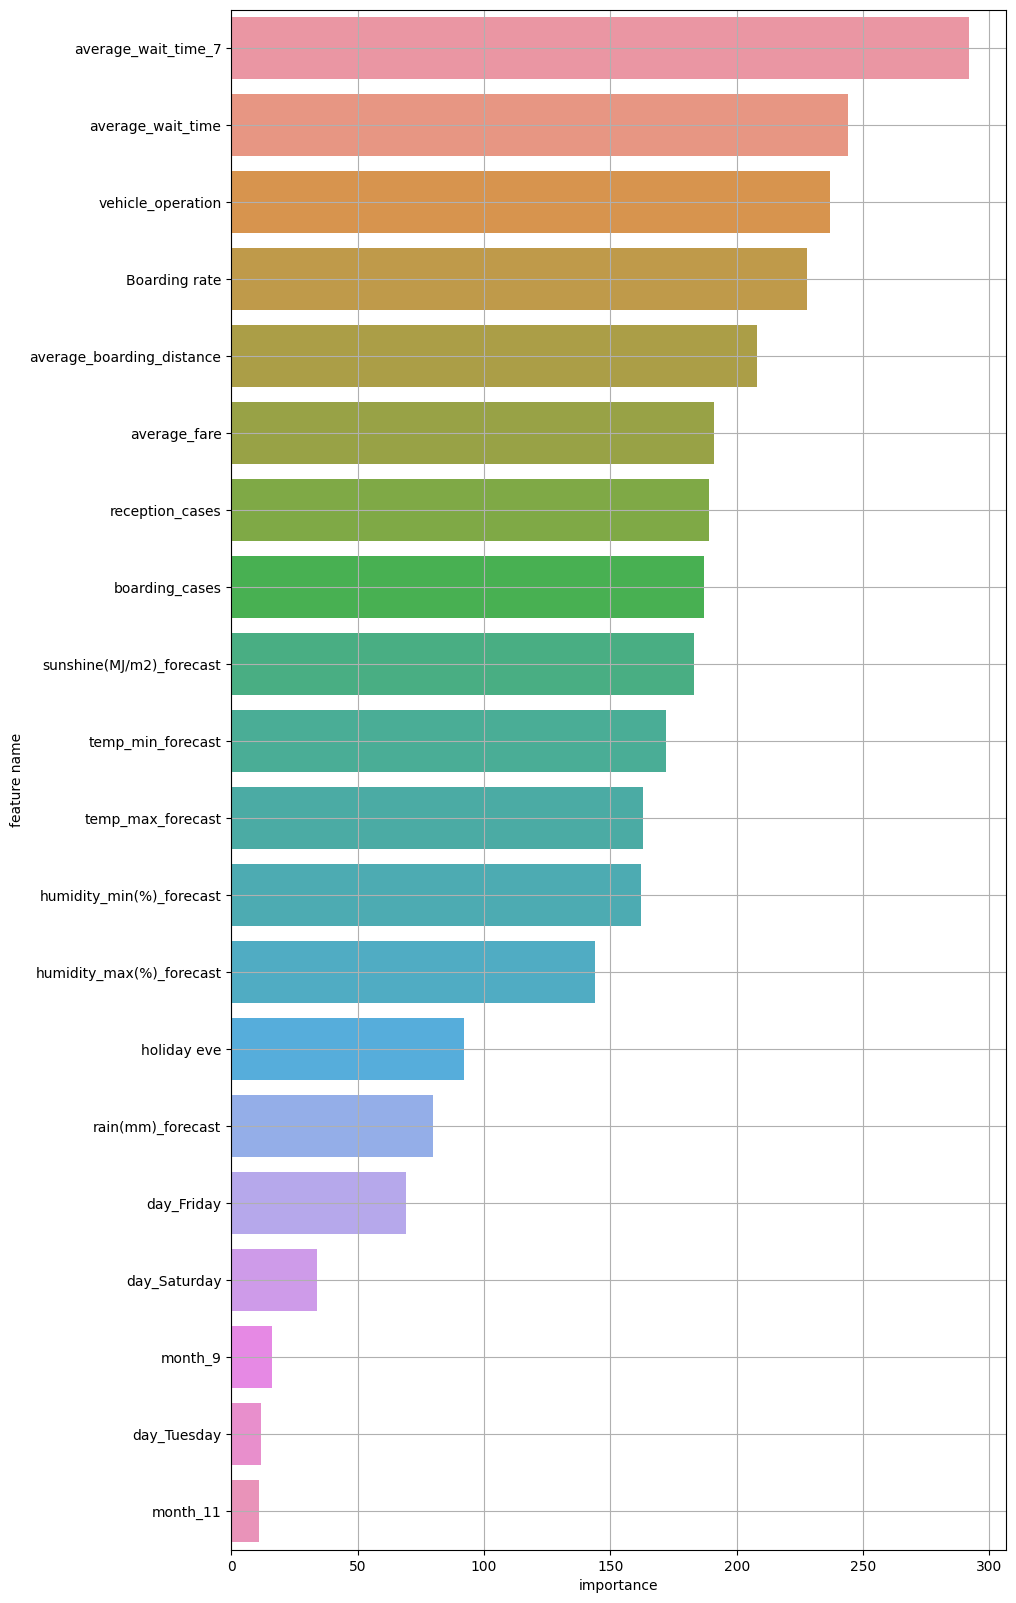

In [22]:
plot_feature_importance(model_lgbm.feature_importances_,x_train.columns,result_only = False, topn =20)

In [ ]:
b=['temp_max_forecast',	'temp_min_forecast',	'rain(mm)_forecast',	'humidity_max(%)_forecast','humidity_min(%)_forecast',	'sunshine(MJ/m2)_forecast']
x_train_deep1 = x_train_deep[b]
x_val_depp1 = x_val_deep[b]
x_train_deep2 = x_train_deep.drop(b,axis=1)
x_test_deep2 = x_val_deep.drop(b,axis=1)

In [ ]:
x_train_deep2

,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,Boarding rate,average_wait_time_7,holiday,holiday eve,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,-1.545618,-1.922936,-1.889561,-1.190898,1.139551,1.474434,1.158603,0.008971,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.037909,-0.496203,-0.343503,-1.611393,-0.831945,-0.640391,1.078291,0.008971,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-1.576218,-1.505274,-1.413230,-0.980650,0.672372,0.918470,1.451564,0.008971,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.675666,-1.506611,-1.403542,-1.099791,1.176925,1.662048,1.610831,0.008971,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.045559,0.233536,0.375839,-0.980650,-0.850632,-0.589313,0.674005,0.008971,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.864097,0.349813,0.579289,-0.910568,-0.962755,-0.962575,1.099202,-1.184541,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2403,0.864097,0.218166,0.450114,-0.945609,-1.158971,-1.115809,1.176820,-1.199780,0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2404,-0.918327,-1.483890,-1.365597,-1.282005,-0.420828,-0.312313,1.785384,-1.230257,1,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2405,-1.293172,-1.981075,-1.912974,-1.457211,1.644104,1.619810,2.162151,-1.218535,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(6,))
hl1 = keras.layers.Dense(32,activation="relu")(il)
hl1 = keras.layers.BatchNormalization()(hl1)
hl1 = keras.layers.Dropout(0.2)(hl1)

il2 = keras.layers.Input(shape=(29,))
hl2 = keras.layers.Dense(32,activation="relu")(il2)
hl2 = keras.layers.BatchNormalization()(hl2)
hl2 = keras.layers.Dropout(0.2)(hl2)

hl = keras.layers.Concatenate()([hl1,hl2])

ol = keras.layers.Dense(1)(hl)

model = keras.models.Model([il,il2],ol)
model.compile(loss = 'mean_absolute_percentage_error',metrics=["mean_absolute_percentage_error"],optimizer="adam")

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           224         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           960         ['input_2[0][0]']                
                                                                                              

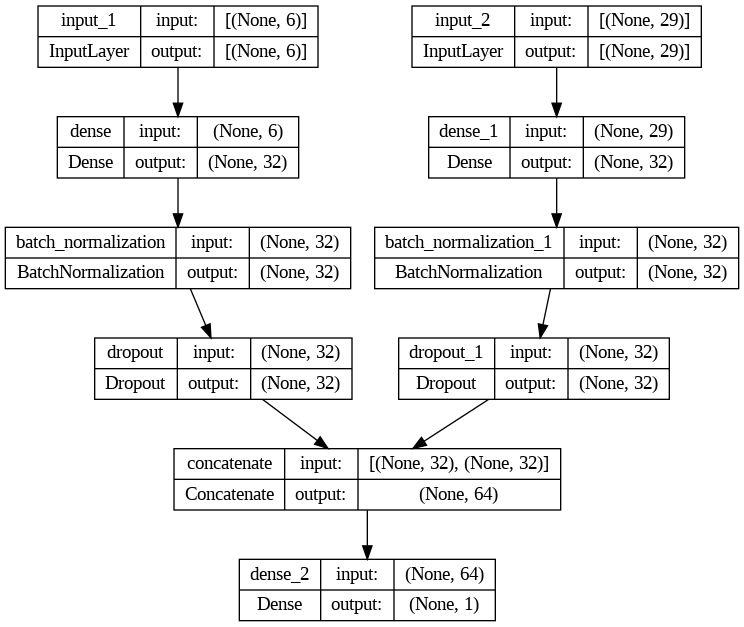

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)
rl = ReduceLROnPlateau(monitor="val_loss",
                       patience=4,
                       factor=0.35,
                       verbose=1,
                       min_lr=0.0000001)
model.fit([x_train_deep1,x_train_deep2],y_train_deep,epochs=1000,verbose=1,callbacks=[es,rl],validation_data=([x_val_depp1,x_test_deep2],y_val_deep))

Epoch 1/1000
76/76 [==============================] - 4s 8ms/step - loss: 98.7848 - mean_absolute_percentage_error: 98.7848 - val_loss: 95.7301 - val_mean_absolute_percentage_error: 95.7301 - lr: 0.0010
Epoch 2/1000
76/76 [==============================] - 0s 6ms/step - loss: 93.5421 - mean_absolute_percentage_error: 93.5421 - val_loss: 87.6051 - val_mean_absolute_percentage_error: 87.6051 - lr: 0.0010
Epoch 3/1000
76/76 [==============================] - 0s 6ms/step - loss: 84.8671 - mean_absolute_percentage_error: 84.8671 - val_loss: 72.1806 - val_mean_absolute_percentage_error: 72.1806 - lr: 0.0010
Epoch 4/1000
76/76 [==============================] - 0s 6ms/step - loss: 74.6138 - mean_absolute_percentage_error: 74.6138 - val_loss: 55.4198 - val_mean_absolute_percentage_error: 55.4198 - lr: 0.0010
Epoch 5/1000
76/76 [==============================] - 0s 6ms/step - loss: 63.6341 - mean_absolute_percentage_error: 63.6341 - val_loss: 41.3304 - val_mean_absolute_percentage_error: 41.330

In [ ]:
x_testtest = x_test[b]
x_testtest1 = x_test.drop(b,axis=1)

In [ ]:
y_pred = model.predict([x_testtest,x_testtest1])
print(mean_absolute_error(y_test_,y_pred))
print(mean_absolute_percentage_error(y_test_,y_pred))

3/3 [==============================] - 0s 4ms/step
4.523726675012609
0.10722173244743037


In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(6,))
hl1 = keras.layers.Dense(32,activation="relu")(il)
hl1 = keras.layers.BatchNormalization()(hl1)
hl1 = keras.layers.Dropout(0.2)(hl1)

il2 = keras.layers.Input(shape=(29,))
hl2 = keras.layers.Dense(32,activation="relu")(il2)
hl2 = keras.layers.BatchNormalization()(hl2)
hl2 = keras.layers.Dropout(0.2)(hl2)

hl = keras.layers.Add()([hl1,hl2])

ol = keras.layers.Dense(1)(hl)

model = keras.models.Model([il,il2],ol)
model.compile(loss = 'mean_absolute_percentage_error',metrics=["mean_absolute_percentage_error"],optimizer="adam")

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           224         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           960         ['input_2[0][0]']                
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)
rl = ReduceLROnPlateau(monitor="val_loss",
                       patience=4,
                       factor=0.35,
                       verbose=1,
                       min_lr=0.0000001)
model.fit([x_train_deep1,x_train_deep2],y_train_deep,epochs=1000,verbose=1,callbacks=[es,rl],validation_data=([x_val_depp1,x_test_deep2],y_val_deep))

Epoch 1/1000
76/76 [==============================] - 3s 8ms/step - loss: 96.9188 - mean_absolute_percentage_error: 96.9188 - val_loss: 91.1420 - val_mean_absolute_percentage_error: 91.1420 - lr: 0.0010
Epoch 2/1000
76/76 [==============================] - 0s 6ms/step - loss: 88.8430 - mean_absolute_percentage_error: 88.8430 - val_loss: 79.1471 - val_mean_absolute_percentage_error: 79.1471 - lr: 0.0010
Epoch 3/1000
76/76 [==============================] - 0s 6ms/step - loss: 79.5998 - mean_absolute_percentage_error: 79.5998 - val_loss: 63.9783 - val_mean_absolute_percentage_error: 63.9783 - lr: 0.0010
Epoch 4/1000
76/76 [==============================] - 1s 8ms/step - loss: 70.0190 - mean_absolute_percentage_error: 70.0190 - val_loss: 49.1319 - val_mean_absolute_percentage_error: 49.1319 - lr: 0.0010
Epoch 5/1000
76/76 [==============================] - 1s 8ms/step - loss: 58.2777 - mean_absolute_percentage_error: 58.2777 - val_loss: 36.4799 - val_mean_absolute_percentage_error: 36.479

In [ ]:
y_pred = model.predict([x_testtest,x_testtest1])
print(mean_absolute_error(y_test_,y_pred))
print(mean_absolute_percentage_error(y_test_,y_pred))

3/3 [==============================] - 0s 4ms/step
4.538630986475682
0.10930546870258588
